In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
churnData_df = pd.read_csv(r'DATA_Customer-Churn.csv')
churnData_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData_df.fillna(churnData_df.mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churnData_df['TotalCharges'] = pd.to_numeric(churnData_df['TotalCharges'], errors="coerce")

In [5]:
churnData_df.drop(["gender","Partner","Dependents","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract"],axis=1,inplace=True)
churnData_df = churnData_df.fillna(churnData_df.mean())

In [6]:
churnData_df['Churn'] = churnData_df['Churn'].replace({'Yes': 1, 'No': 0})

In [7]:
print(churnData_df.isnull().sum())

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


In [8]:
churnData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 275.2 KB


In [9]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [10]:
X = churnData_df.drop('Churn', axis=1)
y = churnData_df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3273,0,33,68.25,2171.15
3672,0,54,70.15,3715.65
13,0,49,103.70,5036.30
4538,0,3,85.80,272.20
5126,0,57,103.05,5925.75


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


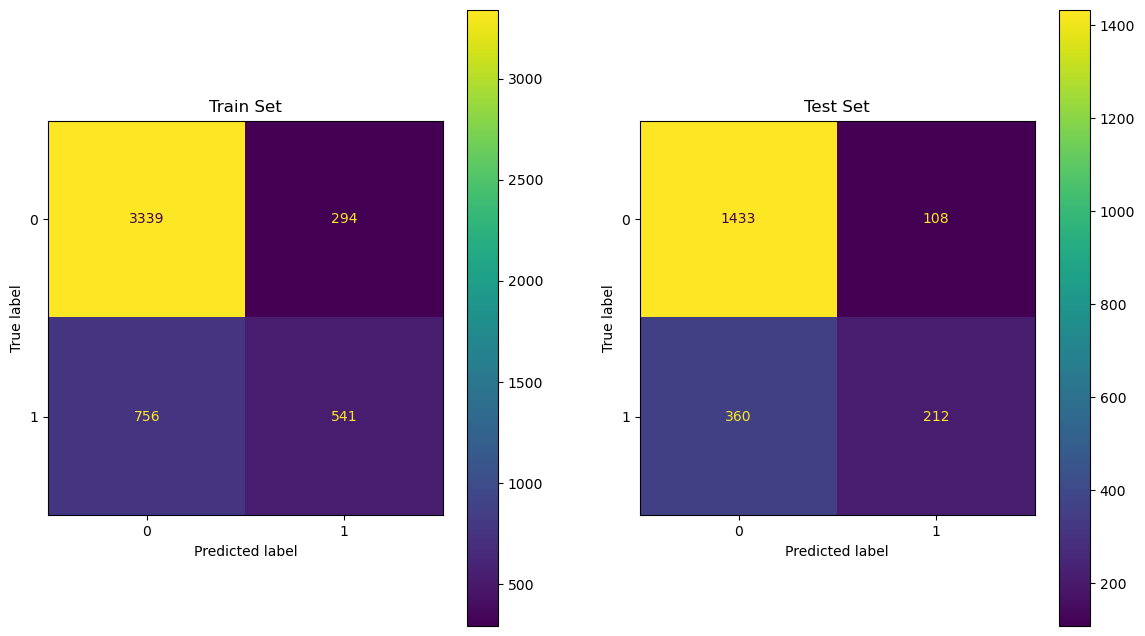

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [19]:
k=1
while k<15:
    model = DecisionTreeClassifier(max_depth=k)
    model.fit(X_train, y_train)
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)
    print("Depth:",k)
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
    print(performance_df)
    print("")
    k+=1

Depth: 1
  Error_metric     Train      Test
0     Accuracy  0.736917  0.729295
1    Precision  0.000000  0.000000
2       Recall  0.000000  0.000000

Depth: 2
  Error_metric     Train      Test
0     Accuracy  0.787018  0.778514
1    Precision  0.647904  0.662500
2       Recall  0.417116  0.370629

Depth: 3
  Error_metric     Train      Test
0     Accuracy  0.787018  0.778514
1    Precision  0.647904  0.662500
2       Recall  0.417116  0.370629

Depth: 4
  Error_metric     Train      Test
0     Accuracy  0.792089  0.781827
1    Precision  0.660000  0.657224
2       Recall  0.432537  0.405594

Depth: 5
  Error_metric     Train      Test
0     Accuracy  0.802840  0.774255
1    Precision  0.691402  0.636888
2       Recall  0.452583  0.386364

Depth: 6
  Error_metric     Train      Test
0     Accuracy  0.805882  0.770942
1    Precision  0.715736  0.636646
2       Recall  0.434850  0.358392

Depth: 7
  Error_metric     Train      Test
0     Accuracy  0.817241  0.774255
1    Precision  0.736